<a href="https://colab.research.google.com/github/8johan/ML-PROJ/blob/main/ML_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi i am Yasine Lehmiani 

This Database contains 3397 patients for the consideration of Testosterone Deficiency. 

Features:

Age: in years (we only considered patients aged from 45-85 years);
Triglycerides (TG): Integer Numbers (mg/dl);
Waist Circumference (WC): in centimeters (medical literature usually thresholds at 102cm);
HDL: Integer numbers (mg/dl);
Hypertension: Binary, in which 1 is presence, and 0 is absence;
Diabetes: Binary, in which 1 is presence, and 0 is absence.
Target:

T: Testosterone (Medical Literature suggests a deficiency when T<300 ng/dl).
link to data https://github.com/osmarluiz/Testosterone-Deficiency-Dataset/blob/main/ptestost.xlsx?raw=true


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import matplotlib.pyplot as plt

In [12]:
#import the data 
x=pd.read_excel('ptestost.xlsx', index_col=None) 

In [13]:
x.head

x.shape
x.head(10)

,Age,DM,TG,HT,HDL,AC,T
0,60,0,145,1,35.0,114.0,0
1,75,0,93,0,48.0,84.0,0
2,50,0,151,0,57.0,99.0,0
3,62,0,178,1,28.0,109.0,0
4,55,0,138,1,62.0,98.0,0
5,79,0,146,1,42.0,100.0,0
6,63,1,245,1,35.0,97.0,0
7,53,0,163,0,55.0,94.0,0
8,69,0,67,0,60.0,107.0,0
9,70,0,92,0,54.0,92.0,0


In [14]:
x.describe()

,Age,DM,TG,HT,HDL,AC,T
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000
mean,61.327348,0.388578,155.269650,0.511922,46.325493,98.916515,0.193112
std,10.072821,0.487499,88.840249,0.499931,10.960146,10.629471,0.394798
min,45.000000,0.000000,12.000000,0.000000,13.000000,43.000000,0.000000
25%,53.000000,0.000000,97.000000,0.000000,39.000000,92.000000,0.000000
50%,60.000000,0.000000,136.000000,1.000000,45.000000,98.000000,0.000000
75%,69.000000,1.000000,183.000000,1.000000,52.000000,105.000000,0.000000
max,85.000000,1.000000,980.000000,1.000000,116.000000,198.000000,1.000000


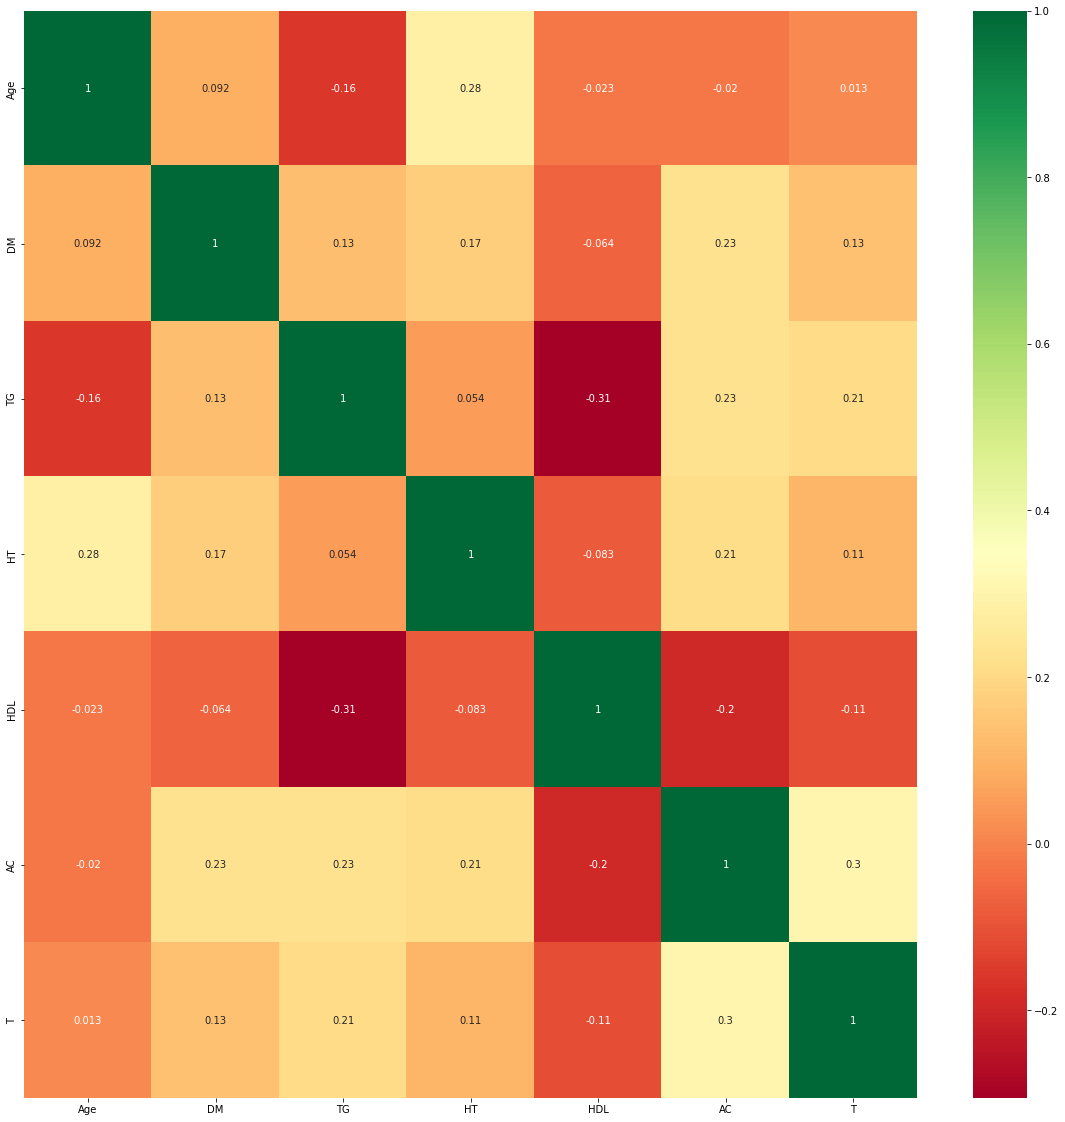

In [15]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset

corrmat =x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
x.corr()

,Age,DM,TG,HT,HDL,AC,T
Age,1.000000,0.092162,-0.159567,0.284759,-0.022599,-0.019767,0.012755
DM,0.092162,1.000000,0.130495,0.170677,-0.064131,0.229361,0.134780
TG,-0.159567,0.130495,1.000000,0.053504,-0.305067,0.227617,0.206086
HT,0.284759,0.170677,0.053504,1.000000,-0.083300,0.213183,0.107686
HDL,-0.022599,-0.064131,-0.305067,-0.083300,1.000000,-0.197804,-0.109804
AC,-0.019767,0.229361,0.227617,0.213183,-0.197804,1.000000,0.303493
T,0.012755,0.134780,0.206086,0.107686,-0.109804,0.303493,1.000000


In [118]:

T_INF_300_true = len(x.loc[x['T'] == 1])
T_SUP_300_false = len(x.loc[x['T'] == 0])
(T_INF_300_true,T_SUP_300_false)

(656, 2741)

train data and test data

In [123]:
from sklearn.model_selection import train_test_split
feature_columns = ['Age','DM', 'TG', 'HT', 'HDL', 'AC']
predicted_class = ['T']

In [124]:
X = x[feature_columns].values
y = x[predicted_class].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

construction of modele 

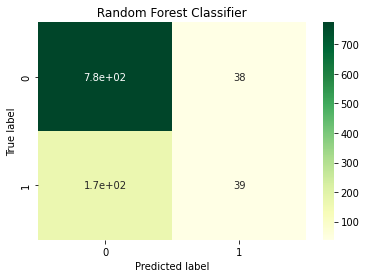

the f1 score for Random Forest Classifier is : 0.5786679072155025
the precision score is : 0.6641693407334976
the recall score is : 0.5708326648483876


0.7980392156862746

In [125]:
from sklearn.metrics import accuracy_score, make_scorer,f1_score, precision_score, recall_score, confusion_matrix
rm= RandomForestClassifier(random_state=20)
rm.fit(X_train, y_train.ravel())
y_pred_train=rm.predict(X_train)
y_pred= rm.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGn")
plt.title(' Random Forest Classifier ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("the f1 score for Random Forest Classifier is :",(f1_score(y_test, y_pred, average="macro")))
print("the precision score is :",(precision_score(y_test, y_pred, average="macro")))
print("the recall score is :",(recall_score(y_test, y_pred, average="macro")))  
rm.score(X_test, y_test)

In [126]:
from sklearn import metrics
print("Accuracy  train  = {0:.3f}".format(metrics.accuracy_score(y_train, y_pred_train)))
print("Accuracy  test = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy  train  = 1.000
Accuracy  test = 0.798


we can see that the model achieved an estimated classification accuracy of about 80 percent the test data and 99.99 percent for train data 

Hyperparameter optimization using RandomizedSearchCV

In [131]:
params={'n_estimators': [ 100, 150, 250, 450, 500,700,800,1000],
        'min_samples_split':[2,3,4,5],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15,17,20,25],
 'random_state':[10,15,20,30,50,75,100]
 
 
    
}
from sklearn.model_selection import RandomizedSearchCV



random_search=RandomizedSearchCV(rm,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y.ravel())
random_search.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=150,
                       random_state=30)

In [133]:
# random forest classifier with optimal hyperparameters found above 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=150,
                       random_state=20)
rfc.fit(X_train, y_train)
y_pred_train=rfc.predict(X_train)
y_pred= rfc.predict(X_test)


rfc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.7931372549019607

In [134]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=5)
score=cross_val_score(rfc,X,y.ravel(),cv=kf)
score

array([0.79705882, 0.81176471, 0.80854197, 0.7982327 , 0.82768778])


# ***UNSUPERVISED*** ***LEARNING***

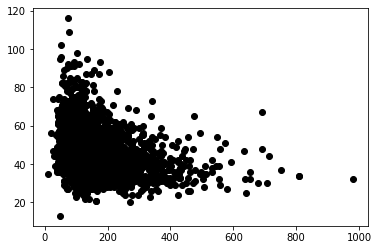

In [135]:

v=x[x['T']==0]
v1=x[x['T']==1]
f=pd.concat([v[1:200], v1[1:200]])
plt.scatter(x = x["TG"],y = x["HDL"],color = "black")


# ***Applying Kernel*** ***PCA***

In [151]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#HERE WE SELECTE ONLY THE  CONTINUOUS FEATURES
X=x[['HDL','TG','AC']]
#TARGET 
y=x[['T']]
scaler = StandardScaler()
X= scaler.fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


RBF kernel 

In [171]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf', fit_inverse_transform=True  ,gamma=10)
X_rbf = kpca.fit_transform(X)
X_11=pd.DataFrame(data=X_rbf,columns=['PC1','PC2'])

X_11


,PC1,PC2
0,-0.041631,-0.042361
1,-0.057391,-0.047473
2,-0.053792,-0.024257
3,-0.031162,-0.029256
4,-0.043855,-0.037320
...,...,...
3392,-0.040841,-0.037096
3393,-0.029638,-0.028321
3394,-0.027360,-0.024696
3395,-0.052532,-0.016321


WE CAN SEE OUR 2 AXIS 

LINEAR KERNEL

In [212]:
kpca1 = KernelPCA(n_components = 2, kernel = 'linear',fit_inverse_transform=True)
X_lin = kpca1.fit_transform(X)
X_1111=pd.DataFrame(data=X_lin,columns=['PC1','PC2'])

X_1111


,PC1,PC2
0,1.284708,0.740217
1,-1.254565,-0.923805
2,-0.602488,0.476891
3,1.644295,-0.054556
4,-1.011699,0.650831
...,...,...
3392,0.156828,0.781142
3393,0.132570,0.272855
3394,5.575980,-0.916319
3395,-0.350685,0.309451


polynomial kernel

In [166]:
kpca2 = KernelPCA(n_components = 2, kernel = 'poly',gamma=15,degree=2)
X_poly = kpca2.fit_transform(X)
X_111=pd.DataFrame(data=X_poly,columns=['PC1','PC2'])

X_111


,PC1,PC2
0,-15.748250,17.247403
1,-5.897760,14.667762
2,-17.295936,-14.497515
3,-9.546905,3.467422
4,-14.519941,-12.888214
...,...,...
3392,-13.141270,-5.906148
3393,-9.167167,-12.908790
3394,626.393327,12.730364
3395,-18.116642,-15.086283


plotting the clustring 

here we will plotting the points with 0 value in feature T in blue and the points with 1 in red

In [205]:
n=y.loc[y['T'] == 1]
nn=y.loc[y['T'] == 0]

u=n.index
u1=nn.index
b=np.array(u)
r=np.array(u1)

<Figure size 432x288 with 0 Axes>

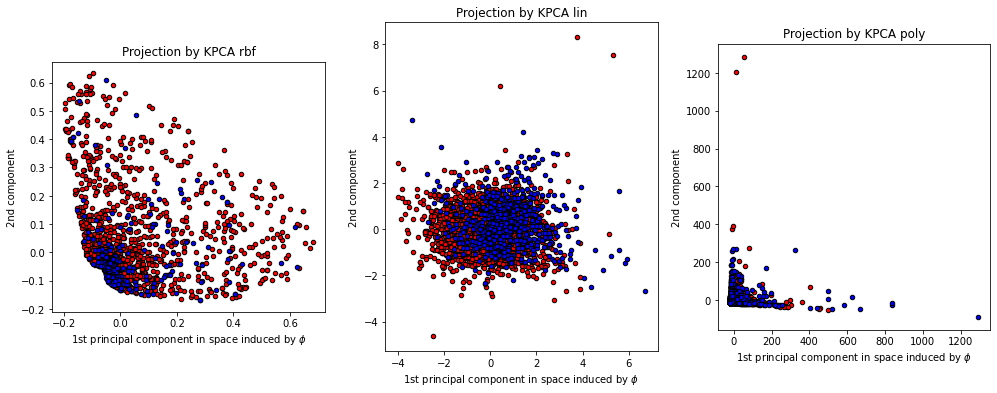

In [209]:









plt.subplots(1, 3, figsize=(14, 6))
plt.subplot(1,3,1,aspect="equal")
plt.scatter(X_rbf[r, 0], X_rbf[r, 1], c="red", s=20, edgecolor="k")
plt.scatter(X_rbf[b, 0], X_rbf[b, 1], c="blue", s=20, edgecolor="k")
plt.title("Projection by KPCA rbf")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(1, 3, 2, aspect="equal")
plt.scatter(X_lin[r, 0], X_lin[r, 1], c="red", s=20, edgecolor="k")
plt.scatter(X_lin[b, 0], X_lin[b, 1], c="blue", s=20, edgecolor="k")
plt.title("Projection by KPCA lin")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(1, 3, 3, aspect="equal")
plt.scatter(X_poly[r, 0], X_poly[r, 1], c="red", s=20, edgecolor="k")
plt.scatter(X_poly[b, 0], X_poly[b, 1], c="blue", s=20, edgecolor="k")
plt.title("Projection by KPCA poly")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")


plt.tight_layout()
plt.show()

**Fitting random forrest  to the  Training set resulting from Kpca**

from rbf kernel

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_rbf, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=1000,
                       random_state=15)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8049019607843138

from linear kernel 

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_lin, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=1000,
                       random_state=15)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8088235294117647

from poly kernel

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=1000,
                       random_state=15)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8058823529411765